In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12196 entries, 0 to 12195
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_names  12196 non-null  object
 1   class        12196 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 190.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_names  5227 non-null   object
dtypes: object(1)
memory usage: 41.0+ KB


In [6]:
train.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [7]:
train['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [8]:
X = []
for image_name in train['image_names']:
    img = plt.imread('images/' + image_name)
    X.append(img)
X = np.array(X)

In [9]:
X.shape

(12196, 224, 224, 3)

In [10]:
y = train['class']

In [11]:
y.shape

(12196,)

In [12]:
rng = np.random.default_rng()

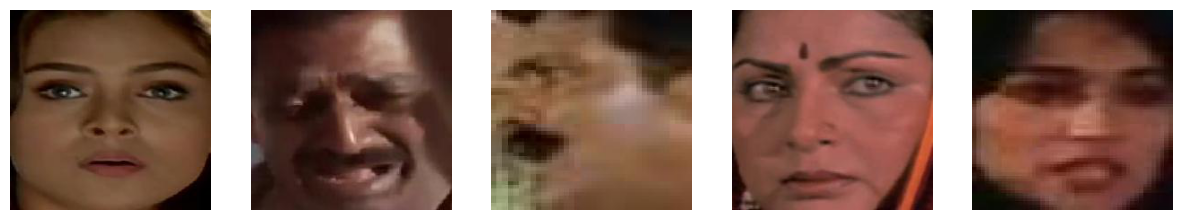

In [21]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(15,20))
for i in range(5):
    ax[i].imshow(X[rng.integers(X.shape[0])])
    ax[i].axis('off')

# Processing

In [22]:
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])

In [23]:
X.shape

(12196, 150528)

In [21]:
X.min(), X.max()

(0, 255)

In [24]:
X = X / X.max()

In [23]:
X.min(), X.max()

(0.0, 1.0)

In [25]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, det_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, DetCurveDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

MemoryError: Unable to allocate 9.57 GiB for an array with shape (8537, 150528) and data type float64

In [19]:
X_train.shape, X_test.shape

((1646, 150528), (706, 150528))

# Model

In [27]:
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, concatenate

In [29]:
model=Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(units=1, activation='sigmoid'))

In [30]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.BinaryCrossentropy(), 
              metrics=[keras.metrics.BinaryAccuracy()])

In [24]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
13/13 [==============================] - 8s 548ms/step - loss: 0.8619 - binary_accuracy: 0.5687 - val_loss: 0.6500 - val_binary_accuracy: 0.6006
Epoch 2/50
13/13 [==============================] - 2s 156ms/step - loss: 0.6506 - binary_accuracy: 0.6215 - val_loss: 0.6514 - val_binary_accuracy: 0.5892
Epoch 3/50
13/13 [==============================] - 2s 148ms/step - loss: 0.6215 - binary_accuracy: 0.6543 - val_loss: 0.6625 - val_binary_accuracy: 0.5878
Epoch 4/50
13/13 [==============================] - 2s 149ms/step - loss: 0.6189 - binary_accuracy: 0.6610 - val_loss: 0.5920 - val_binary_accuracy: 0.6941
Epoch 5/50
13/13 [==============================] - 2s 152ms/step - loss: 0.6311 - binary_accuracy: 0.6689 - val_loss: 0.6042 - val_binary_accuracy: 0.6714
Epoch 6/50
13/13 [==============================] - 2s 193ms/step - loss: 0.6269 - binary_accuracy: 0.6495 - val_loss: 0.6004 - val_binary_accuracy: 0.6742
Epoch 7/50
13/13 [==============================] - 2s 155ms/ste

In [33]:
history = model.fit(X, y, batch_size=128, epochs=50, verbose=1)

MemoryError: Unable to allocate 6.84 GiB for an array with shape (12196, 150528) and data type float32

In [67]:
prediction = model.predict(X_test)

23/23 [==============================] - 1s 24ms/step


In [68]:
prediction_cat = (prediction >= 0.5).astype(int)

In [69]:
print(classification_report(y_test, prediction_cat))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       396
           1       0.75      0.53      0.62       310

    accuracy                           0.72       706
   macro avg       0.73      0.70      0.70       706
weighted avg       0.72      0.72      0.71       706



In [28]:
history_df = pd.DataFrame(history.history)

In [29]:
history_df.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.861873,0.568651,0.650047,0.600567
1,0.650641,0.621507,0.651361,0.589235
2,0.621458,0.654314,0.662465,0.587819
3,0.618947,0.660996,0.592006,0.694051
4,0.631105,0.668894,0.604152,0.671388


Text(0.5, 0.01, 'epochs')

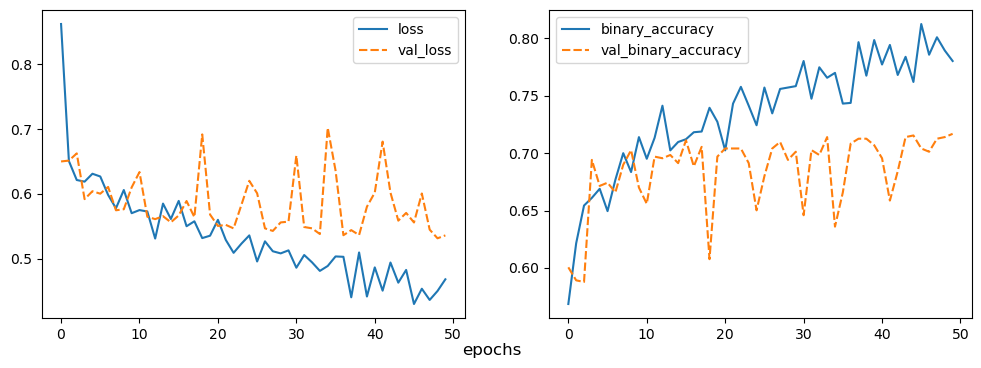

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.lineplot(history_df[['loss', 'val_loss']], ax=ax1)
sns.lineplot(history_df[['binary_accuracy', 'val_binary_accuracy']], ax=ax2)
fig.supxlabel('epochs')

actual class 0, predicted probability 0.21764212846755981


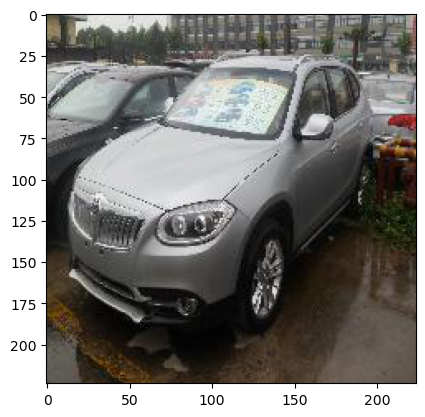

In [105]:
index = rng.integers(X_test.shape[0])
plt.imshow(np.reshape(X_test[index], (224,224,3)))
print(f'actual class {y_test.iloc[index]}, predicted probability {prediction[index][0]}')